# Average precipitation profile Zandvoort

In [143]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [130]:
# Import txt file
data = pd.read_csv("neerslaggeg_ZANDVOORT_229.txt", sep=',', parse_dates=['YYYYMMDD']) # Put data in DataFrame
data = data.fillna(0) # Replace None values with 0
data.drop('STN', inplace=True, axis=1)


In [131]:
print(data)

        YYYYMMDD     RD     SX  Unnamed: 4
0     1951-01-01     35                0.0
1     1951-01-02     35                0.0
2     1951-01-03      0                0.0
3     1951-01-04      0                0.0
4     1951-01-05     30                0.0
...          ...    ...    ...         ...
25471 2020-09-26     73      0         0.0
25472 2020-09-27    130      0         0.0
25473 2020-09-28     39      0         0.0
25474 2020-09-29     51      0         0.0
25475 2020-09-30     14      0         0.0

[25476 rows x 4 columns]


In [132]:
data.columns

Index(['YYYYMMDD', '   RD', '   SX', 'Unnamed: 4'], dtype='object')

In [133]:
data = data.rename(columns={'   RD': 'RD'})
data = data.rename(columns={'   SX': 'SX'})

In [140]:
data.dtypes

YYYYMMDD      datetime64[ns]
RD                     int64
SX                    object
Unnamed: 4           float64
dtype: object

# All data is now converted to right type

In [135]:
data.loc['1951']

KeyError: '1951'

# Overall daily average for period 1951 to 2020

In [141]:
davg = data.resample('D').mean()
davg_NA = data.loc[data.YYYYMMDDD]
davg_daily = data.fillna(method='ffill')
print(davg_daily)



TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'

TypeError: float() argument must be a string or a number, not 'Timestamp'

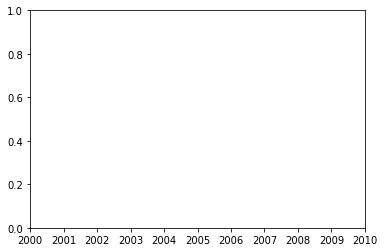

In [145]:
fig, ax = plt.subplots()
ax.plot(data['YYYYMMDD'], davg_daily)
ax.xaxis.set_major_locator(mdates.DayLocater())
ax.legend()
ax.set_xlabel('Day')
ax.set_ylabel('Precipitation (mm)')
ax.set_title('Daily Rain Average')